In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\user\\dataset\\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical",

)

Found 70727 images belonging to 15 classes.


In [4]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5550658  0.57467365 0.6531051 ]
  [0.56396705 0.5835749  0.66200626]
  [0.6002054  0.61981326 0.69824463]
  ...
  [0.47046515 0.47438672 0.5528181 ]
  [0.47007748 0.47399905 0.55243045]
  [0.4696898  0.47361135 0.5520427 ]]

 [[0.5558412  0.57544905 0.6538804 ]
  [0.55737644 0.5769843  0.65541565]
  [0.6071837  0.62679154 0.7052229 ]
  ...
  [0.46593946 0.46986103 0.54829234]
  [0.46322566 0.46714723 0.5455786 ]
  [0.46051186 0.46443343 0.54286486]]

 [[0.55661654 0.5762244  0.65465575]
  [0.55078584 0.5703937  0.64882505]
  [0.61416197 0.6337698  0.71220124]
  ...
  [0.43997788 0.44389945 0.5223308 ]
  [0.44346702 0.4473886  0.52581996]
  [0.44695616 0.45087773 0.5293091 ]]

 ...

 [[0.5650846  0.5846924  0.6592022 ]
  [0.5631462  0.582754   0.6572638 ]
  [0.5612078  0.5808156  0.6553254 ]
  ...
  [0.48184484 0.4859358  0.5642825 ]
  [0.45562923 0.4595508  0.5379822 ]
  [0.45110354 0.4550251  0.53345644]]

 [[0.55774206 0.5773499  0.6518597 ]
  [0.55735433 0.5769622  0.65147203]


In [5]:
train_generator.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Healthy': 2,
 'Late_blight': 3,
 'Leaf_Miner': 4,
 'Leaf_Mold': 5,
 'Magnesium_Deficiency': 6,
 'Mosaic_virus': 7,
 'Nitrogen_Deficiency': 8,
 'Pottassium_Deficiency': 9,
 'Septoria_leaf_spot': 10,
 'Spotted_Wilt_Virus': 11,
 'Target_Spot': 12,
 'Two_spotted_spider_mite': 13,
 'Yellow_Leaf_Curl_Virus': 14}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_spot',
 'Early_blight',
 'Healthy',
 'Late_blight',
 'Leaf_Miner',
 'Leaf_Mold',
 'Magnesium_Deficiency',
 'Mosaic_virus',
 'Nitrogen_Deficiency',
 'Pottassium_Deficiency',
 'Septoria_leaf_spot',
 'Spotted_Wilt_Virus',
 'Target_Spot',
 'Two_spotted_spider_mite',
 'Yellow_Leaf_Curl_Virus']

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'C:\\Users\\user\\dataset\\val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical"
)

Found 8837 images belonging to 15 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
         'C:\\Users\\user\\dataset\\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical"
)

Found 8853 images belonging to 15 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.69658184 0.7475622  0.8142289 ]
  [0.69635385 0.74733424 0.8140009 ]
  [0.69612586 0.74710625 0.8137729 ]
  ...
  [0.66029423 0.70735306 0.8014707 ]
  [0.6627451  0.70980394 0.80392164]
  [0.6627451  0.70980394 0.80392164]]

 [[0.70049673 0.7514772  0.81814384]
  [0.7002688  0.7512492  0.81791586]
  [0.7000408  0.7510212  0.81768787]
  ...
  [0.6605223  0.7075811  0.80169874]
  [0.6627451  0.70980394 0.80392164]
  [0.6627451  0.70980394 0.80392164]]

 [[0.7019608  0.75294125 0.8196079 ]
  [0.7019608  0.75294125 0.8196079 ]
  [0.7019608  0.75294125 0.8196079 ]
  ...
  [0.66075027 0.7078091  0.80192673]
  [0.6627451  0.70980394 0.80392164]
  [0.6627451  0.70980394 0.80392164]]

 ...

 [[0.70970917 0.76068956 0.8273562 ]
  [0.7058824  0.7568628  0.8235295 ]
  [0.7058824  0.7568628  0.8235295 ]
  ...
  [0.6666667  0.70980394 0.7960785 ]
  [0.6666667  0.70980394 0.7960785 ]
  [0.6666667  0.70980394 0.7960785 ]]

 [[0.7092532  0.7602336  0.8269003 ]
  [0.7058824  0.7568628  0.8235295 ]


In [10]:
n_classes = 15

input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  # Changed to softmax for categorical classification
])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,495 (1.33 MB)

 Trainable params: 348,495 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_crossentropy'
)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [13]:
70727/32

2210.21875

In [14]:
8837/32

276.15625

In [15]:
history=model.fit(
    train_generator,
    batch_size =32,
    validation_data=validation_generator,
      verbose=1,
    epochs=25,
)

Epoch 1/25


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1138s 514ms/step - accuracy: 0.5284 - loss: 1.3905 - val_accuracy: 0.8693 - val_loss: 0.4066
Epoch 2/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1138s 514ms/step - accuracy: 0.8732 - loss: 0.3777 - val_accuracy: 0.8949 - val_loss: 0.3193
Epoch 3/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1145s 517ms/step - accuracy: 0.9071 - loss: 0.2750 - val_accuracy: 0.9189 - val_loss: 0.2391
Epoch 4/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1145s 517ms/step - accuracy: 0.9249 - loss: 0.2207 - val_accuracy: 0.9236 - val_loss: 0.2158
Epoch 5/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1145s 517ms/step - accuracy: 0.9378 - loss: 0.1831 - val_accuracy: 0.9306 - val_loss: 0.2053
Epoch 6/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1145s 517ms/step - accuracy: 0.9418 - loss: 0.1697 - val_accuracy: 0.9430 - val_loss: 0.1778
Epoch 7/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1146s 517ms/step - accuracy: 0.9486 - loss: 0.1473 - val_accuracy: 0.9477 - val_loss: 0.1676
Epoch 8/25
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 1137s 514ms/step - accur

In [16]:
scores = model.evaluate(test_generator)

277/277 ━━━━━━━━━━━━━━━━━━━━ 79s 284ms/step - accuracy: 0.9725 - loss: 0.0894


In [17]:
scores

[0.09896225482225418, 0.9707443714141846]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 2211}

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

25

In [23]:
history.history['loss'][:10]

[0.8878987431526184,
 0.34837082028388977,
 0.26103201508522034,
 0.21761257946491241,
 0.18860550224781036,
 0.16478362679481506,
 0.15686090290546417,
 0.1421060562133789,
 0.13437272608280182,
 0.1273711919784546]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.8692995309829712,
 0.8948737978935242,
 0.9188638925552368,
 0.9236165881156921,
 0.9306325912475586,
 0.9429670572280884,
 0.9477198123931885,
 0.9549620747566223,
 0.9533778429031372,
 0.9431933760643005,
 0.9489645957946777,
 0.9618648886680603,
 0.9536041617393494,
 0.9585832357406616,
 0.9443249702453613,
 0.9639017581939697,
 0.9589226841926575,
 0.952133059501648,
 0.964354395866394,
 0.9666176438331604,
 0.9547357559204102,
 0.9665044546127319,
 0.9534910321235657,
 0.9700124263763428,
 0.9663913249969482]

In [26]:
acc

[0.7008355855941772,
 0.8836936354637146,
 0.9116461873054504,
 0.9256578087806702,
 0.9356398582458496,
 0.943557620048523,
 0.9462015628814697,
 0.9519278407096863,
 0.9543173313140869,
 0.9566501975059509,
 0.9576258063316345,
 0.9608494639396667,
 0.9634510278701782,
 0.9657415151596069,
 0.965642511844635,
 0.9657556414604187,
 0.9692338109016418,
 0.967353343963623,
 0.9705063104629517,
 0.9691913723945618,
 0.9714677333831787,
 0.9716233015060425,
 0.9712556600570679,
 0.9729947447776794,
 0.9723160862922668]

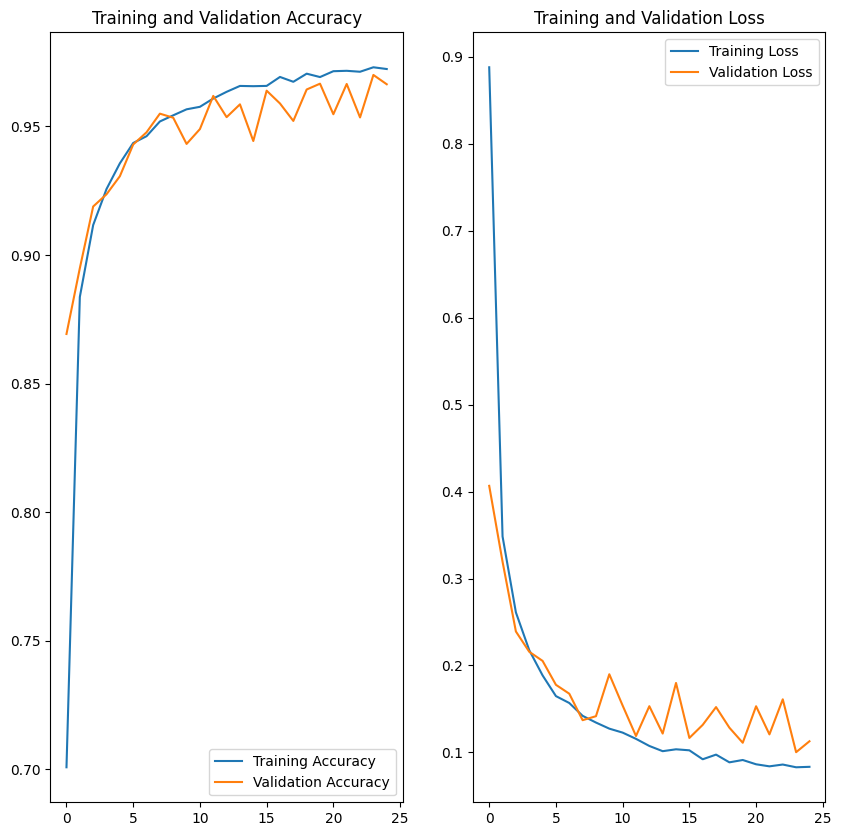

In [27]:


EPOCHS = 25

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict:


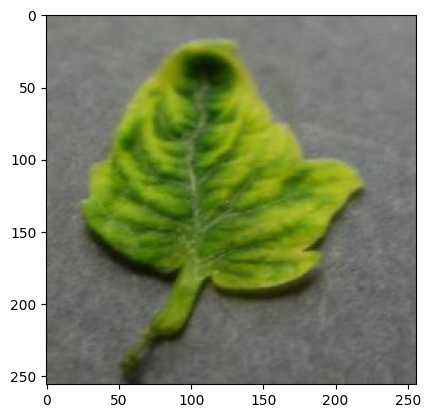

Actual label: Yellow_Leaf_Curl_Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted label: Yellow_Leaf_Curl_Virus


In [28]:

import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label_index = np.argmax(label_batch[0])  # Get the index of the first label
    first_label = class_names[first_label_index]  # Convert the index to the original label

    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()  # Added to display the image
    print("Actual label:", first_label)
    
    batch_prediction = model.predict(image_batch)
    predicted_label_index = np.argmax(batch_prediction[0])  # Get the index of the predicted label
    predicted_label = class_names[predicted_label_index]  # Convert the index to the original label
    print("Predicted label:", predicted_label)
    
    break


In [29]:
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class_index = np.argmax(predictions[0])
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class_index, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


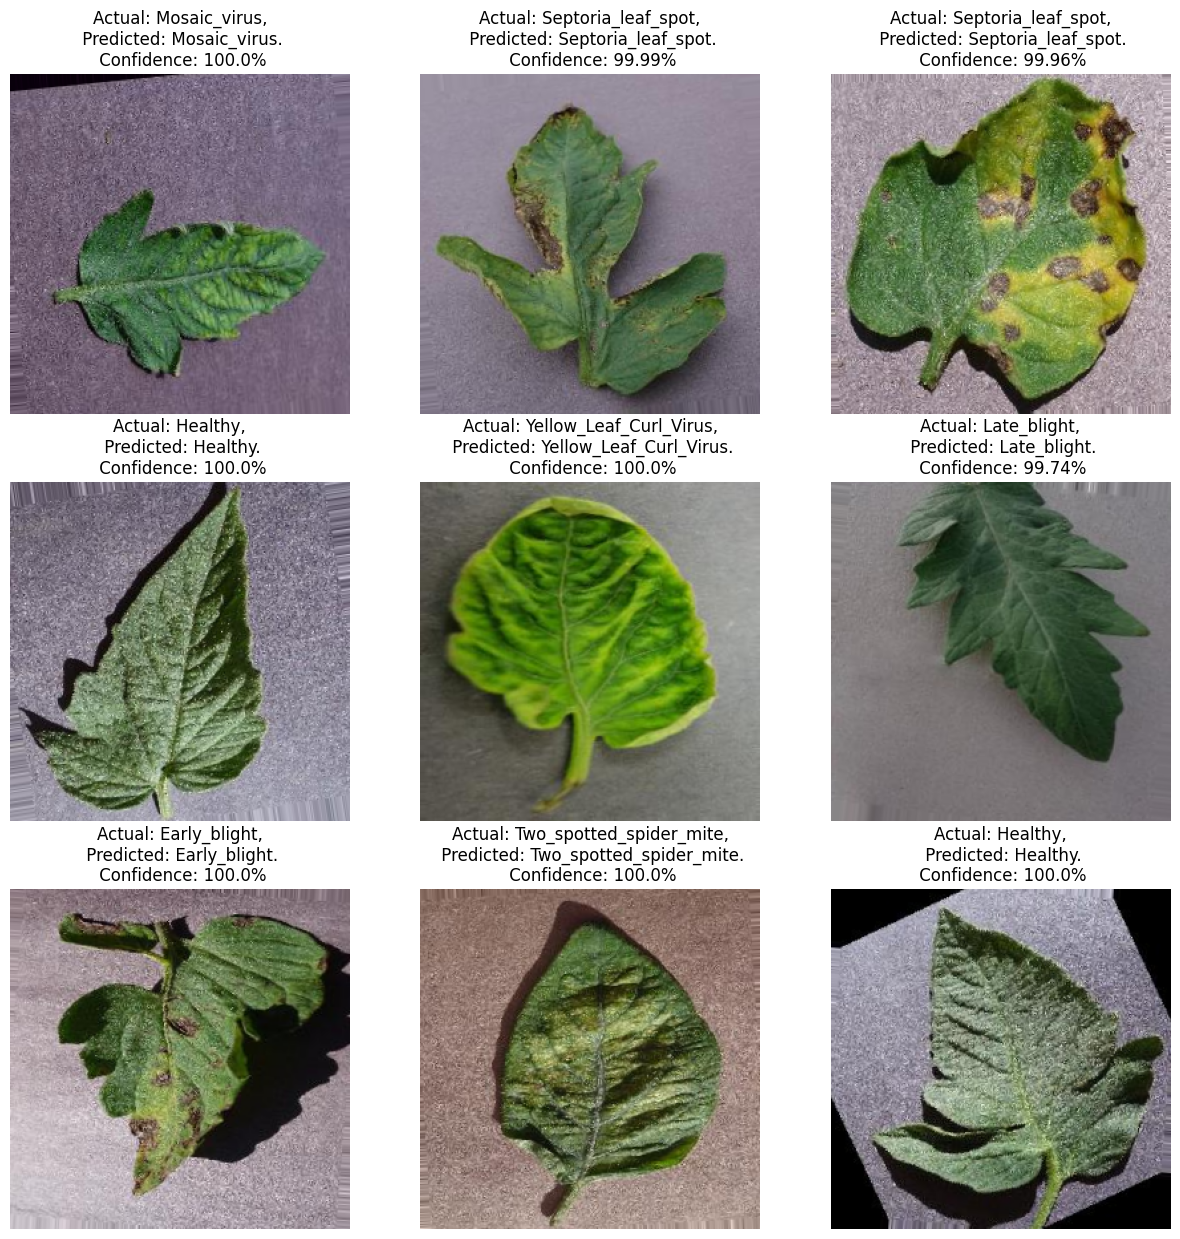

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class_index, confidence = predict(model, images[i], class_names)
        predicted_class = class_names[predicted_class_index]
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    
    break  # Exit the loop after the first batch
    
plt.show()



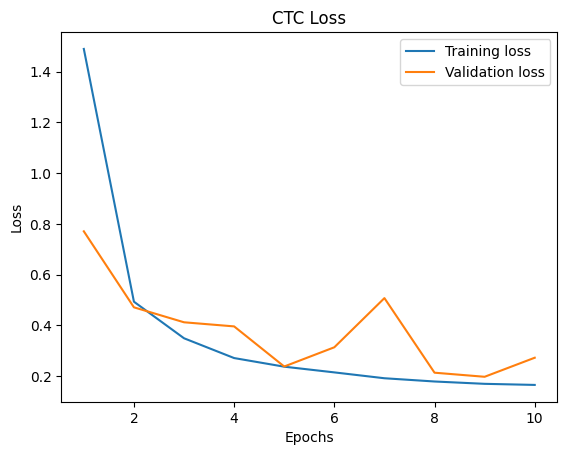

In [31]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Assuming 10 epochs
train_losses = [1.4896, 0.4932, 0.3490, 0.2710, 0.2370, 0.2145, 0.1914, 0.1786, 0.1694, 0.1651]
val_losses = [0.7706, 0.4710, 0.4120, 0.3958, 0.2377, 0.3135, 0.5073, 0.2133, 0.1972, 0.2723]

plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, val_losses, label='Validation loss')
plt.title('CTC Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
model.save('tomato_dieases_model.h5')